# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
In 2-4 sentences, explain the kind of problem you want to look at and the datasets you will be wrangling for this project.

Answer: The problem our research paper aims to address is, in the United States:
1. What is California's estimated gun purchases and population in 2022?
2. Does there appear to be a trend in the most recent 4 years? 

To answer our question, our research paper will explore two datasets, the US Census Bureau's ACS Public Use Microdata and the FBI's NICS National Instant Criminal Background Check System. 

Both data sets contain corresponding variables allowing us to combine our data sets.

Finding the right datasets can be time-consuming. Here we provide you with a list of websites to start with. But we encourage you to explore more websites and find the data that interests you.

* Google Dataset Search https://datasetsearch.research.google.com/
* The U.S. Government’s open data https://data.gov/
* UCI Machine Learning Repository https://archive.ics.uci.edu/ml/index.php


### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

#### **Dataset 1**

Type: CSV File

Method: I used two methods to gather the 2023-2013 ACS Public Use Microdata. The first data gathering method I used was accessing the US Census Bureau API. The second data gathering method I used was downloading the remaining datasets via the ACS Public Use Microdata API Table creator then put all together in a csv. 

This method was chosen to simulate real life data gathering by combining multiple sources via API combined with a manual pull. The data was chosen so that I could compare population growth to gun sales growth.

***Note on Data (Month): There is only one month of data for each state for each year since population estimates are only pulled onced a year NOT monthly. This does not conflict with our research question as only one population estimate for the State of California for 2022 is necessary to answer our research question. ***

Dataset variables:

*   Month: Month and Year 
*   Selected Geographies: State
*   Total Sex (SEX): State Population Totals
*   Male: Total Male Population in a State
*   Female: Total Female Population in a State



ACS Public Use Microdata API:
https://api.census.gov/data/2023/acs/acs1/pums?get=PWGTP,AGEP,SEX&ucgid=0200000US2,0200000US1,0200000US3,0200000US4,0400000US01,0400000US02,0400000US04,0400000US05,0400000US06,0400000US08,0400000US09,0400000US10,0400000US11,0400000US12,0400000US13,0400000US15,0400000US16,0400000US17,0400000US18,0400000US19,0400000US20,0400000US21,0400000US22,0400000US23,0400000US24,0400000US25,0400000US26,0400000US27,0400000US28,0400000US29,0400000US30,0400000US31,0400000US32,0400000US33,0400000US34,0400000US35,0400000US36,0400000US37,0400000US38,0400000US39,0400000US40,0400000US41,0400000US42,0400000US44,0400000US45,0400000US46,0400000US47,0400000US48,0400000US49,0400000US50,0400000US51,0400000US53,0400000US54,0400000US55,0400000US56

ACS Public Use Microdata Tables:
https://data.census.gov/app/mdat/ACSPUMS1Y2023/table?vv=AGEP&rv=ucgid&cv=SEX&nv=AGEP_RC1&wt=PWGTP&g=AwJm-BVBlEBoCMcDMcAsB9YaJWsJUObYgVmIDZiAOYgTkWESQXgVQXISoQHZFaCBmDggkIeCFQg0o8iCoh+IWiAbImyJMnjJUyWcnLIqyfslrIGOdEjTw0stOTRU0-NLTQNSTUklJUUllSclIKIA&AGEP_RC1=N4IgyiBcIEoKYGMD2ATOACAZkgTugggOZwgA0sUI+A4gKIAKZIAalANpsgAMpAjJPwCcgpgDkkAF3S0ANgGc4AdwAWcHBmo4kAVwAOcFGQk5tcALpmAvkA


In [30]:
#1st data gathering and loading method
import pandas as pd
import numpy as np

#Read in Dataset
og_pop = pd.read_csv('us-pop-2013-2023.csv')
og_pop.head()

,Month,Selected Geographies,Total Sex (SEX),Male,Female
0,2013-11,Alabama,"4,833,722","2,341,174","2,492,548"
1,2013-11,Alaska,"735,132","385,004","350,128"
2,2013-11,Arizona,"6,626,624","3,301,269","3,325,355"
3,2013-11,Arkansas,"2,959,373","1,461,197","1,498,176"
4,2013-11,California,"38,332,521","19,058,739","19,273,782"


#### Dataset 2

Type: CSV File

Method: The following FBI NICS data was programatically downloaded via Github from Buzzfeed's open source journalism repository via the command line from my terminal. The following dataset was chosen in order to analyze the cultural climate surrounding gun purchase sales spikes via data analysis.

Dataset variables:

*   month: Month and year of background check
*   state: State
*   handgun: Hand gun totals for month
*   long_gun: Long gun totals for month
*   multiple: Multiple gun totals for month
*   sales_total: Combined Hand gun, Long gun, and Multiple gun totals for month (will be created later)

The downloaded CSV has numerous fields that will be dropped in the final cleaning. The variables above are the only ones needed to make my final analysis of sales totals in a given month per state.

The suggested formula as decribed by Jurgen Brauer, a professor at Georgia Regents University for calculating gun sales, ie 'sales total', for each month is the following: 
- Each long gun and handgun check is counted as 1.1 sales, 
- Each multiple-gun check is counted as two sales
- Permit checks and other types of checks are omitted. 

Finally, in California, multiple-gun checks will be excluded because data is inconsistent.


NICS FBI Firearm Data:
https://github.com/BuzzFeedNews/nics-firearm-background-checks/blob/master/data/partial/nics-checks-last-five-years.csv

In [31]:
#2nd data gathering and loading method
import pandas as pd
import numpy as np

#Read in Dataset
og_gun_sales = pd.read_csv('gun-data-2018-2023.csv')
og_gun_sales.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2023-09,Alabama,10342,145,15421,12848,1156,1052,0,14,...,0,0,0,29,21,14,0,1,0,44556
1,2023-09,Alaska,188,10,2429,2543,262,197,0,0,...,0,0,0,0,1,0,0,0,0,5922
2,2023-09,Arizona,9113,2014,14398,8239,1575,931,0,14,...,0,0,0,6,6,0,1,0,0,38189
3,2023-09,Arkansas,2139,181,5645,6108,437,466,6,8,...,0,0,0,6,13,2,0,0,0,17207
4,2023-09,California,28611,15559,33792,20548,4295,0,0,1,...,56,0,0,7289,3093,529,26,10,0,118625


In [32]:
#Save original data to data store

og_pop.to_csv('original_us_pop_data_2013_2023', index=False)
og_gun_sales.to_csv('original_gun_data_2018_2023', index=False)


## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1:

In [33]:
#Inspecting the dataframe visually
og_pop.head()

,Month,Selected Geographies,Total Sex (SEX),Male,Female
0,2013-11,Alabama,"4,833,722","2,341,174","2,492,548"
1,2013-11,Alaska,"735,132","385,004","350,128"
2,2013-11,Arizona,"6,626,624","3,301,269","3,325,355"
3,2013-11,Arkansas,"2,959,373","1,461,197","1,498,176"
4,2013-11,California,"38,332,521","19,058,739","19,273,782"


In [34]:
og_gun_sales.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2023-09,Alabama,10342,145,15421,12848,1156,1052,0,14,...,0,0,0,29,21,14,0,1,0,44556
1,2023-09,Alaska,188,10,2429,2543,262,197,0,0,...,0,0,0,0,1,0,0,0,0,5922
2,2023-09,Arizona,9113,2014,14398,8239,1575,931,0,14,...,0,0,0,6,6,0,1,0,0,38189
3,2023-09,Arkansas,2139,181,5645,6108,437,466,6,8,...,0,0,0,6,13,2,0,0,0,17207
4,2023-09,California,28611,15559,33792,20548,4295,0,0,1,...,56,0,0,7289,3093,529,26,10,0,118625


In [35]:
#Inspecting the dataframe programmatically
og_pop.describe()

,Month,Selected Geographies,Total Sex (SEX),Male,Female
count,510,510,510,510,510
unique,10,51,459,459,459
top,2018-11,Alabama,"1,095,610","535,451","560,159"
freq,52,10,2,2,2


In [36]:
og_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 510 non-null    object
 1   Selected Geographies  510 non-null    object
 2   Total Sex (SEX)       510 non-null    object
 3   Male                  510 non-null    object
 4   Female                510 non-null    object
dtypes: object(5)
memory usage: 20.0+ KB


In [37]:
og_gun_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3135 entries, 0 to 3134
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   month                      3135 non-null   object
 1   state                      3135 non-null   object
 2   permit                     3135 non-null   int64 
 3   permit_recheck             3135 non-null   int64 
 4   handgun                    3135 non-null   int64 
 5   long_gun                   3135 non-null   int64 
 6   other                      3135 non-null   int64 
 7   multiple                   3135 non-null   int64 
 8   admin                      3135 non-null   int64 
 9   prepawn_handgun            3135 non-null   int64 
 10  prepawn_long_gun           3135 non-null   int64 
 11  prepawn_other              3135 non-null   int64 
 12  redemption_handgun         3135 non-null   int64 
 13  redemption_long_gun        3135 non-null   int64 
 14  redempti

#### Issue and justification: 
The numeric data types from both data sets are currently incompatible. 

The data type that holds the state's population, 'Total Sex (SEX)', 'Male', 'Female' and 'Month' from the us population dataset is an 'object' and is incompatible with the 'int64' data type from the gun sales dataset making it impossible to combine the numbers and calculate the per capita gun sales per state. The 'Total Sex (SEX)', 'Male', 'Female' and 'Month' state population data will need to be converted to int64 to do so.

### Quality Issue 2:

In [38]:
#Inspecting the dataframe visually
og_gun_sales.head(155)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2023-09,Alabama,10342,145,15421,12848,1156,1052,0,14,...,0,0,0,29,21,14,0,1,0,44556
1,2023-09,Alaska,188,10,2429,2543,262,197,0,0,...,0,0,0,0,1,0,0,0,0,5922
2,2023-09,Arizona,9113,2014,14398,8239,1575,931,0,14,...,0,0,0,6,6,0,1,0,0,38189
3,2023-09,Arkansas,2139,181,5645,6108,437,466,6,8,...,0,0,0,6,13,2,0,0,0,17207
4,2023-09,California,28611,15559,33792,20548,4295,0,0,1,...,56,0,0,7289,3093,529,26,10,0,118625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,2023-07,Pennsylvania,26303,2,33320,15865,19,0,271,0,...,3,0,0,0,0,0,0,0,0,76555
151,2023-07,Puerto Rico,0,0,3583,314,50,34,0,1,...,0,0,0,974,92,9,2,0,0,5115
152,2023-07,Rhode Island,0,0,869,516,86,97,0,0,...,4,0,0,10,2,0,1,1,0,1624
153,2023-07,South Carolina,9198,332,8471,4497,1036,471,2,4,...,28,0,0,2,6,0,0,0,0,25186


In [39]:
#Inspecting the dataframe programmatically
og_gun_sales.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,3135.000000,3.135000e+03,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,...,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3.135000e+03
mean,11139.589793,1.364249e+04,13863.027113,8816.029984,1091.933652,482.578947,15.670813,5.462201,4.602552,0.760128,...,6.041786,0.113238,0.137161,132.724721,64.024561,14.385008,1.864115,1.523764,0.148644,5.040540e+04
std,34666.780538,7.112779e+04,16248.221232,8401.964761,1516.425336,737.983911,185.803483,11.269021,10.895729,1.839406,...,29.574841,0.801801,0.953785,788.905859,326.387640,69.731480,7.951274,5.651549,0.666629,8.809198e+04
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+00
25%,668.000000,0.000000e+00,2910.500000,2640.000000,156.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.498500e+03
50%,3168.000000,1.000000e+01,8086.000000,6120.000000,581.000000,219.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,8.000000,8.000000,1.000000,0.000000,0.000000,0.000000,2.416000e+04
75%,11850.500000,4.535000e+02,19545.000000,12977.000000,1459.000000,632.000000,2.000000,7.000000,5.000000,1.000000,...,2.000000,0.000000,0.000000,32.000000,24.000000,4.000000,1.000000,1.000000,0.000000,5.759000e+04
max,480752.000000,1.350676e+06,147714.000000,61827.000000,26896.000000,8286.000000,6259.000000,138.000000,196.000000,28.000000,...,592.000000,13.000000,18.000000,10623.000000,4159.000000,829.000000,117.000000,62.000000,18.000000,1.427917e+06


#### Issue and justification: 
The Gun Sales dataset has completeness issues.

Each year does not cover each month, for example the data for months October, November, and December in 2023 are missing, making it difficult to get accurate numbers for each year. 

This is not be a problem for estimating our trend analysis. This will also not affect our chosen year, 2022, which has complete data.

### Tidiness Issue 1:

In [40]:
#Inspecting the dataframe visually
og_pop.head()

,Month,Selected Geographies,Total Sex (SEX),Male,Female
0,2013-11,Alabama,"4,833,722","2,341,174","2,492,548"
1,2013-11,Alaska,"735,132","385,004","350,128"
2,2013-11,Arizona,"6,626,624","3,301,269","3,325,355"
3,2013-11,Arkansas,"2,959,373","1,461,197","1,498,176"
4,2013-11,California,"38,332,521","19,058,739","19,273,782"


In [41]:
#Inspecting the dataframe programmatically
og_pop.columns

Index(['Month', 'Selected Geographies', 'Total Sex (SEX)', 'Male', 'Female'], dtype='object')

In [42]:
og_gun_sales.columns

Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'],
      dtype='object')

#### Issue and justification:  

Inconsistent data header styles between the US Population and Gun Sales data.

The US Population data set is in title case and uses spaces between multiple words while the Gun Sales data is all lower case and uses underscores instead of spaces. The US Population data will be updated to reflect the Gun Sales data heading styles. 

### Tidiness Issue 2: 

In [43]:
#Inspecting the dataframe visually
og_pop.head()

,Month,Selected Geographies,Total Sex (SEX),Male,Female
0,2013-11,Alabama,"4,833,722","2,341,174","2,492,548"
1,2013-11,Alaska,"735,132","385,004","350,128"
2,2013-11,Arizona,"6,626,624","3,301,269","3,325,355"
3,2013-11,Arkansas,"2,959,373","1,461,197","1,498,176"
4,2013-11,California,"38,332,521","19,058,739","19,273,782"


In [44]:
#Inspecting the dataframe programmatically
og_gun_sales.columns

Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'],
      dtype='object')

#### Issue and justification: 

Update confusing title names, 'Selected Geographies', 'Total Sex (SEX)', 'Month' & 'month' 

The US Population data set will get updated headings that are more descriptive. In place of 'Selected Geographies' and 'Total Sex (SEX)', 'Month' & 'month' the headings will read 'state' and 'population' and 'month_year'.

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [45]:
# Make copies of the datasets to ensure the raw dataframes are not impacted
cleaned_us_pop = og_pop.copy()
cleaned_gun_sales = og_gun_sales.copy()

### **Quality Issue 1: FILL IN**

In [46]:
# Apply the cleaning strategy
cleaned_us_pop = og_pop.copy()
cleaned_us_pop['Total Sex (SEX)'] = pd.to_numeric(cleaned_us_pop['Total Sex (SEX)'].str.replace(',', ''), errors='coerce').dropna().astype('int64')
cleaned_us_pop['Male'] = pd.to_numeric(cleaned_us_pop['Male'].str.replace(',', ''), errors='coerce').dropna().astype('int64')
cleaned_us_pop['Female'] = pd.to_numeric(cleaned_us_pop['Female'].str.replace(',', ''), errors='coerce').dropna().astype('int64')

cleaned_us_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 510 non-null    object
 1   Selected Geographies  510 non-null    object
 2   Total Sex (SEX)       510 non-null    int64 
 3   Male                  510 non-null    int64 
 4   Female                510 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 20.0+ KB


In [47]:
# Validate the cleaning was successful
cleaned_us_pop.head()

,Month,Selected Geographies,Total Sex (SEX),Male,Female
0,2013-11,Alabama,4833722,2341174,2492548
1,2013-11,Alaska,735132,385004,350128
2,2013-11,Arizona,6626624,3301269,3325355
3,2013-11,Arkansas,2959373,1461197,1498176
4,2013-11,California,38332521,19058739,19273782


#### Justification: 

The data type 'Total Sex (SEX)', 'Male', and 'Female' from the us population dataset was an 'object' and has been converted to 'int64' data type. This included some tidying up first by removing the commas and dashes as they are non numeric characters.

### **Quality Issue 2: FILL IN**

In [48]:
#Visually assess data
cleaned_gun_sales = og_gun_sales.copy()

cleaned_gun_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3135 entries, 0 to 3134
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   month                      3135 non-null   object
 1   state                      3135 non-null   object
 2   permit                     3135 non-null   int64 
 3   permit_recheck             3135 non-null   int64 
 4   handgun                    3135 non-null   int64 
 5   long_gun                   3135 non-null   int64 
 6   other                      3135 non-null   int64 
 7   multiple                   3135 non-null   int64 
 8   admin                      3135 non-null   int64 
 9   prepawn_handgun            3135 non-null   int64 
 10  prepawn_long_gun           3135 non-null   int64 
 11  prepawn_other              3135 non-null   int64 
 12  redemption_handgun         3135 non-null   int64 
 13  redemption_long_gun        3135 non-null   int64 
 14  redempti

In [49]:
#Visually assess data
cleaned_gun_sales.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2023-09,Alabama,10342,145,15421,12848,1156,1052,0,14,...,0,0,0,29,21,14,0,1,0,44556
1,2023-09,Alaska,188,10,2429,2543,262,197,0,0,...,0,0,0,0,1,0,0,0,0,5922
2,2023-09,Arizona,9113,2014,14398,8239,1575,931,0,14,...,0,0,0,6,6,0,1,0,0,38189
3,2023-09,Arkansas,2139,181,5645,6108,437,466,6,8,...,0,0,0,6,13,2,0,0,0,17207
4,2023-09,California,28611,15559,33792,20548,4295,0,0,1,...,56,0,0,7289,3093,529,26,10,0,118625


In [50]:
#Apply cleaning strategy
cleaned_gun_sales = cleaned_gun_sales.rename(columns={'month': 'month_year'})
cleaned_gun_sales.head()

,month_year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2023-09,Alabama,10342,145,15421,12848,1156,1052,0,14,...,0,0,0,29,21,14,0,1,0,44556
1,2023-09,Alaska,188,10,2429,2543,262,197,0,0,...,0,0,0,0,1,0,0,0,0,5922
2,2023-09,Arizona,9113,2014,14398,8239,1575,931,0,14,...,0,0,0,6,6,0,1,0,0,38189
3,2023-09,Arkansas,2139,181,5645,6108,437,466,6,8,...,0,0,0,6,13,2,0,0,0,17207
4,2023-09,California,28611,15559,33792,20548,4295,0,0,1,...,56,0,0,7289,3093,529,26,10,0,118625


In [51]:
#Apply and validate the cleaning was successful
ca = cleaned_gun_sales[cleaned_gun_sales['state'] == 'California']

ca22 = ca[ca['month_year'].astype(str).str.startswith('2022')]

ca22.head(20)

,month_year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
499,2022-12,California,22839,10947,40213,28073,5523,0,0,1,...,125,0,0,7124,2848,610,40,18,0,121543
554,2022-11,California,24117,11341,37386,25634,4888,0,0,0,...,83,0,0,6830,2815,535,20,5,1,116394
609,2022-10,California,27623,11356,36991,22350,4451,0,0,2,...,47,0,0,7383,2942,528,68,14,0,116527
664,2022-09,California,39113,12104,34417,22375,4527,0,0,1,...,163,0,0,7283,2974,561,10,10,0,126521
719,2022-08,California,39274,14674,39236,25005,5743,0,0,0,...,82,0,0,7708,3463,647,15,19,18,138358
774,2022-07,California,22621,12734,41159,23489,6090,0,0,1,...,94,0,0,7914,3261,651,33,15,0,120932
829,2022-06,California,20367,11254,43113,27018,7422,0,0,0,...,135,0,0,7848,3128,779,39,19,1,123930
884,2022-05,California,18159,11740,37659,23729,5143,0,0,2,...,214,0,0,7362,3033,607,20,4,0,111612
939,2022-04,California,17944,12972,38217,25572,5595,5,1,1,...,158,0,0,7491,3186,698,23,7,0,116208
994,2022-03,California,19327,12427,43976,29658,6490,5,0,0,...,235,0,0,8282,3558,804,18,21,0,129391


#### Justification: 

We are filtering California by our selected year of 2022 to get all of the gun sales data needed to answer our question.

### **Tidiness Issue 1: FILL IN**

In [52]:
#Inspect dataframe visually
cleaned_us_pop.head()

,Month,Selected Geographies,Total Sex (SEX),Male,Female
0,2013-11,Alabama,4833722,2341174,2492548
1,2013-11,Alaska,735132,385004,350128
2,2013-11,Arizona,6626624,3301269,3325355
3,2013-11,Arkansas,2959373,1461197,1498176
4,2013-11,California,38332521,19058739,19273782


In [53]:
#Apply cleaning strategy and validate the cleaning was successful
cleaned_us_pop = cleaned_us_pop.rename(columns={'Month': 'month', 'Selected Geographies': 'selected_geographies', 'Total Sex (SEX)': 'total_sex', 'Male': 'male', 'Female': 'female'})

cleaned_us_pop.head()

,month,selected_geographies,total_sex,male,female
0,2013-11,Alabama,4833722,2341174,2492548
1,2013-11,Alaska,735132,385004,350128
2,2013-11,Arizona,6626624,3301269,3325355
3,2013-11,Arkansas,2959373,1461197,1498176
4,2013-11,California,38332521,19058739,19273782


#### Justification: 

Inconsistent data header styles between the US Population and Gun Sales data was updated to match the Gun Sales data styles. Now all data types are lowercase and uses underscores. 


### **Tidiness Issue 2: FILL IN**

In [54]:
#Inspect dataframe visually
cleaned_us_pop.head()

,month,selected_geographies,total_sex,male,female
0,2013-11,Alabama,4833722,2341174,2492548
1,2013-11,Alaska,735132,385004,350128
2,2013-11,Arizona,6626624,3301269,3325355
3,2013-11,Arkansas,2959373,1461197,1498176
4,2013-11,California,38332521,19058739,19273782


In [55]:
#Apply cleaning strategy and validate the cleaning was successful
cleaned_us_pop = cleaned_us_pop.rename(columns={'month': 'month_year','selected_geographies': 'state', 'total_sex': 'population'})

cleaned_us_pop.head()

,month_year,state,population,male,female
0,2013-11,Alabama,4833722,2341174,2492548
1,2013-11,Alaska,735132,385004,350128
2,2013-11,Arizona,6626624,3301269,3325355
3,2013-11,Arkansas,2959373,1461197,1498176
4,2013-11,California,38332521,19058739,19273782


#### Justification: 

For interpretability, the US Population data titles are now more descriptive. In place of 'Selected Geographies', 'Total Sex (SEX)' the headings will read 'state' and 'population'.

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [56]:
#Remove unnecessary variables, write function to calculate gun sales for mont/year, and filter for California 2022

def process_california_sales(cleaned_gun_sales):
    # Calculate sales total
    cleaned_gun_sales['sales_total'] = ((cleaned_gun_sales['handgun'] + cleaned_gun_sales['long_gun']) * 1.1) + (cleaned_gun_sales['multiple'] * 2)
    
    # Filter for California in 2022
    ca_sales_22 = cleaned_gun_sales[(cleaned_gun_sales['state'] == 'California') & 
                                    (cleaned_gun_sales['month_year'].astype(str).str.startswith('2022'))]
    
    # Sum the sales total for California in 2022
    total_sales_2022 = ca_sales_22['sales_total'].sum()
    
    # Add a new column with the total sales for 2022
    cleaned_gun_sales['2022_sales_total'] = total_sales_2022
    
    return cleaned_gun_sales

cgs1 = process_california_sales(cleaned_gun_sales)

cgs2 = cgs1[['month_year', 'state', 'handgun', 'long_gun', 'multiple', 'sales_total', '2022_sales_total']]

cgs2[(cleaned_gun_sales['state'] == 'California') & 
     (cleaned_gun_sales['month_year'].astype(str).str.startswith('2022'))]

,month_year,state,handgun,long_gun,multiple,sales_total,2022_sales_total
499,2022-12,California,40213,28073,0,75114.6,842215.0
554,2022-11,California,37386,25634,0,69322.0,842215.0
609,2022-10,California,36991,22350,0,65275.1,842215.0
664,2022-09,California,34417,22375,0,62471.2,842215.0
719,2022-08,California,39236,25005,0,70665.1,842215.0
774,2022-07,California,41159,23489,0,71112.8,842215.0
829,2022-06,California,43113,27018,0,77144.1,842215.0
884,2022-05,California,37659,23729,0,67526.8,842215.0
939,2022-04,California,38217,25572,5,70177.9,842215.0
994,2022-03,California,43976,29658,5,81007.4,842215.0


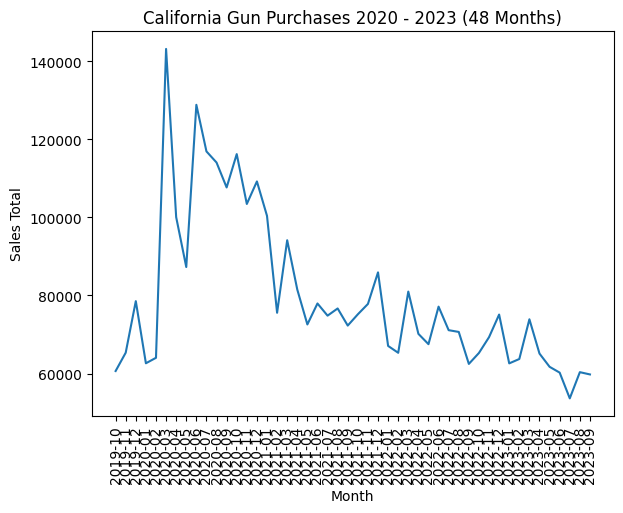

In [57]:
# Visual trend analysis of gun purchases in California in the last 48 months

import matplotlib.pyplot as plt

def process_california_sales(cleaned_gun_sales):
    # Calculate sales total
    cleaned_gun_sales['sales_total'] = ((cleaned_gun_sales['handgun'] + cleaned_gun_sales['long_gun']) * 1.1) + (cleaned_gun_sales['multiple'] * 2)
    
    # Filter for California in 2022
    ca_sales_22 = cleaned_gun_sales[(cleaned_gun_sales['state'] == 'California') & 
                                    (cleaned_gun_sales['month_year'].astype(str).str.startswith('2022'))]
    
    # Sum the sales total for California in 2022
    total_sales_2022 = ca_sales_22['sales_total'].sum()
    
    # Add a new column with the total sales for 2022
    cleaned_gun_sales['2022_sales_total'] = total_sales_2022
    
    return cleaned_gun_sales

cgs1 = process_california_sales(cleaned_gun_sales)

cgs2 = cgs1[['month_year', 'state', 'handgun', 'long_gun', 'multiple', 'sales_total', '2022_sales_total']]

cgs2[(cleaned_gun_sales['state'] == 'California') & 
     (cleaned_gun_sales['month_year'].astype(str).str.startswith('2022'))]


cgs2.set_index('state', inplace=True)

cgs2.loc[['California']].head(48)

cgs2_viz1 = cgs2.loc[['California']].head(48)

plt.plot(cgs2_viz1['month_year'], cgs2_viz1['sales_total'])
plt.xlabel('Month')
plt.ylabel('Sales Total')
plt.title('California Gun Purchases 2020 - 2023 (48 Months)')
plt.tight_layout()
plt.xticks(rotation='vertical')
plt.gca().invert_xaxis()
plt.show()

In [59]:
#Filter by California 2022 most recent sales numbers, review visually, then begin to remove unnecessary gun data
ca_sales = cgs1[cgs1['state'] == 'California']
ca_sales_22 = ca_sales[ca_sales['month_year'].astype(str).str.startswith('2022')]

ca_sales_2022 = ca_sales_22[['month_year', 'state', 'sales_total', '2022_sales_total']]

ca_sales_2022.iloc[1]

month_year             2022-11
state               California
sales_total            69322.0
2022_sales_total      842215.0
Name: 554, dtype: object

In [60]:
#Cleaned and filtered US Population data
cleaned_us_pop.head()

ca_pop = cleaned_us_pop[cleaned_us_pop['state'] == 'California']
ca_pop_2022 = ca_pop[ca_pop['month_year'].astype(str).str.startswith('2022')]

ca_pop_2022.head()

,month_year,state,population,male,female
412,2022-11,California,39029342,19538713,19490629


In [61]:
# Combine datasets
ca_gun_pop = pd.merge(cleaned_us_pop, cleaned_gun_sales, on=['month_year', 'state'], how='inner')

ca_final = ca_gun_pop[ca_gun_pop['state'] == 'California']
ca_data_final = ca_final[ca_final['month_year'].astype(str).str.startswith('2022')]

# Drop unused columns, empty rows, reset index
ca_data_final = ca_data_final.dropna()
ca_data_final = ca_data_final.drop(columns=
        ['permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals', 'male', 'female', 'sales_total'])
ca_data_final = ca_data_final.reset_index(drop=True)


ca_data_final

,month_year,state,population,2022_sales_total
0,2022-11,California,39029342,842215.0


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [62]:
#Saving data
ca_data_final.to_csv('2022_ca_pop_gun_sales.csv', index=False)

In [63]:
import pandas as pd

test_dataframe = pd.read_csv('2022_ca_pop_gun_sales.csv')
test_dataframe.head()

,month_year,state,population,2022_sales_total
0,2022-11,California,39029342,842215.0


## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

#### Research question:

1. What is California's estimated gun purchases and population in 2022?
2. Does there appear to be a trend in the most recent 4 years?

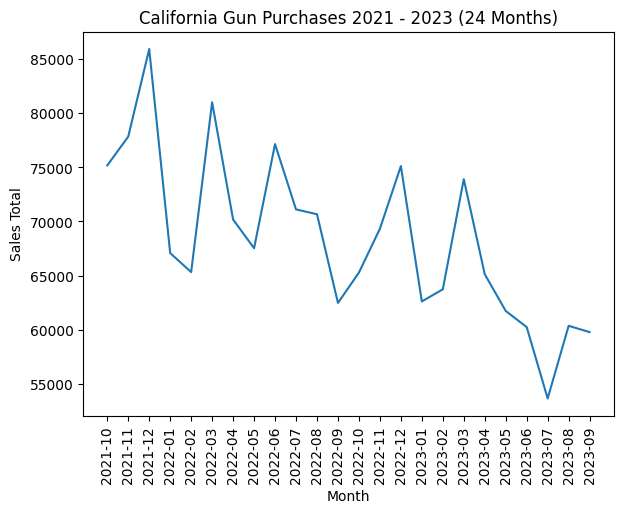

In [64]:
#Visual 1 - FILL IN
import matplotlib.pyplot as plt

def process_california_sales(cleaned_gun_sales):
    # Calculate sales total
    cleaned_gun_sales['sales_total'] = ((cleaned_gun_sales['handgun'] + cleaned_gun_sales['long_gun']) * 1.1) + (cleaned_gun_sales['multiple'] * 2)
    
    # Filter for California in 2022
    ca_sales_22 = cleaned_gun_sales[(cleaned_gun_sales['state'] == 'California') & 
                                    (cleaned_gun_sales['month_year'].astype(str).str.startswith('2022'))]
    
    # Sum the sales total for California in 2022
    total_sales_2022 = ca_sales_22['sales_total'].sum()
    
    # Add a new column with the total sales for 2022
    cleaned_gun_sales['2022_sales_total'] = total_sales_2022
    
    return cleaned_gun_sales

cgs1 = process_california_sales(cleaned_gun_sales)

cgs2 = cgs1[['month_year', 'state', 'handgun', 'long_gun', 'multiple', 'sales_total', '2022_sales_total']]

cgs2[(cleaned_gun_sales['state'] == 'California') & 
     (cleaned_gun_sales['month_year'].astype(str).str.startswith('2022'))]


cgs2.set_index('state', inplace=True)

cgs2.loc[['California']].head(24)

cgs2_viz1 = cgs2.loc[['California']].head(24)

plt.plot(cgs2_viz1['month_year'], cgs2_viz1['sales_total'])
plt.xlabel('Month')
plt.ylabel('Sales Total')
plt.title('California Gun Purchases 2021 - 2023 (24 Months)')
plt.tight_layout()
plt.xticks(rotation='vertical')
plt.gca().invert_xaxis()
plt.show()

In [35]:
ca_data_final

,month,state,population,2022_sales_total
0,2022-11,California,39029342,842215.0


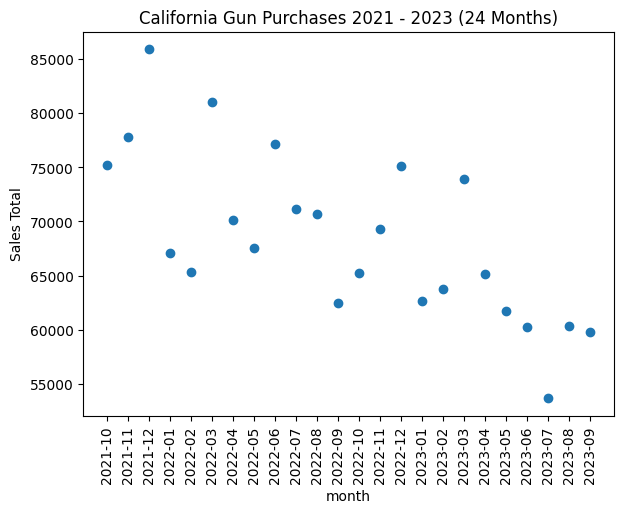

In [65]:
#Visual 2 - FILL IN
import matplotlib.pyplot as plt

def process_california_sales(cleaned_gun_sales):
    # Calculate sales total
    cleaned_gun_sales['sales_total'] = ((cleaned_gun_sales['handgun'] + cleaned_gun_sales['long_gun']) * 1.1) + (cleaned_gun_sales['multiple'] * 2)
    
    # Filter for California in 2022
    ca_sales_22 = cleaned_gun_sales[(cleaned_gun_sales['state'] == 'California') & 
                                    (cleaned_gun_sales['month_year'].astype(str).str.startswith('2022'))]
    
    # Sum the sales total for California in 2022
    total_sales_2022 = ca_sales_22['sales_total'].sum()
    
    # Add a new column with the total sales for 2022
    cleaned_gun_sales['2022_sales_total'] = total_sales_2022
    
    return cleaned_gun_sales

cgs1 = process_california_sales(cleaned_gun_sales)

cgs2 = cgs1[['month_year', 'state', 'handgun', 'long_gun', 'multiple', 'sales_total', '2022_sales_total']]

cgs2[(cleaned_gun_sales['state'] == 'California') & 
     (cleaned_gun_sales['month_year'].astype(str).str.startswith('2022'))]


cgs2.set_index('state', inplace=True)

cgs2.loc[['California']].head(24)

cgs2_viz2 = cgs2.loc[['California']].head(24)

plt.scatter(cgs2_viz2['month_year'], cgs2_viz2['sales_total'])
plt.xlabel('month')
plt.ylabel('Sales Total')
plt.title('California Gun Purchases 2021 - 2023 (24 Months)')
plt.tight_layout()
plt.xticks(rotation='vertical')
plt.gca().invert_xaxis()
plt.show()

#### Research question answers: 

1. Answer: California's Population in 2022 is 39,029,342 and their total estimated gun sales are 842,215

2. Answer: There does appear to be a trend downard in gun sales in California over the last 24 months from 2021 to 2023.

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* If I had more time I would analyze gun purchases per capita by state. Then I would sort the states based on highest purchase rate per capita and lowest per capita. Texas and California have the highest gun purchases annually but when compared to their total populations that amount is less impressive.